In [44]:
#import dependencies 

import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#pull data from csvs 

fao_data_csv = "Resources/aquastatt.csv"
who_data_csv = "Resources/choleraa.csv"

fao_data=pd.read_csv(fao_data_csv)
chol_data = pd.read_csv(who_data_csv)

#test FAO data
fao_data.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
0,Myanmar,28.0,Dependency ratio,4192.0,1992.0,14.13,I,NaN
1,Myanmar,28.0,Dependency ratio,4192.0,1997.0,14.13,I,NaN
2,Myanmar,28.0,Dependency ratio,4192.0,2002.0,14.13,I,NaN
3,Myanmar,28.0,Dependency ratio,4192.0,2007.0,14.13,I,NaN
4,Myanmar,28.0,Dependency ratio,4192.0,2012.0,14.13,I,NaN


In [34]:
#check columns 
#what??
fao_data.columns

Index(['Area', 'Area Id', 'Variable Name', 'Variable Id', 'Year', 'Value',
       'Symbol', 'Md'],
      dtype='object')

In [4]:
#data came in with column data offset from "real" column names. Filter out "right data" with wrong column headers

fao_cleanup = fao_data[["Area", "Variable Name", "Year", "Value"]]

fao_cleanup.head()

,Area,Variable Name,Year,Value
0,Myanmar,Dependency ratio,1992.0,14.13
1,Myanmar,Dependency ratio,1997.0,14.13
2,Myanmar,Dependency ratio,2002.0,14.13
3,Myanmar,Dependency ratio,2007.0,14.13
4,Myanmar,Dependency ratio,2012.0,14.13


In [68]:
#Testing file_2
count2 = len(chol_data["COUNTRY (DISPLAY)"].value_counts())
# print(chol_data["COUNTRY (DISPLAY)"])
#creating a new dataframe with selected columns
clean_data = chol_data[["COUNTRY (DISPLAY)","YEAR (DISPLAY)","Display Value"]]

clean_df = pd.DataFrame(clean_data)
clean_df.head()


,COUNTRY (DISPLAY),YEAR (DISPLAY),Display Value
0,Afghanistan,1960,887
1,Bangladesh,1960,15618
2,India,1960,14621
3,Indonesia,1960,41
4,Myanmar,1960,259


In [67]:
#use .loc to filter out just rows with country names at head (take out rows at end that don't have data)

fao_targets = fao_cleanup.loc[fao_cleanup["Area"].isin(["Myanmar","Niger", "Nigeria", "Thailand"])]

fao_targets.index.name = "Index"

                              
fao_final = fao_targets.rename(columns={"Area":"Country"})

#convert year data to integers 

fao_final["Year"] = fao_final["Year"].astype(int)
fao_final


# # for country in fao_final:
#     if fao_final["Value"] == "NaN":
#         fao_final["Value"] = 0
        
# fao_indexed
fao_final.head()

,Country,Variable Name,Year,Value
Index,,,,
0,Myanmar,Dependency ratio,1992,14.13
1,Myanmar,Dependency ratio,1997,14.13
2,Myanmar,Dependency ratio,2002,14.13
3,Myanmar,Dependency ratio,2007,14.13
4,Myanmar,Dependency ratio,2012,14.13


In [75]:
# #selecting data for specific data
# #clean_d = clean_df.loc[clean_df["COUNTRY (DISPLAY)"] == "Nigeria", :]
who_final = clean_df.loc[clean_df["COUNTRY (DISPLAY)"].isin(["Nigeria","Niger","Myanmar", "Thailand"])]

# clean.head()
who_final.head()

,COUNTRY (DISPLAY),YEAR (DISPLAY),Display Value
4,Myanmar,1960,259
13,Myanmar,1965,207
17,Thailand,1965,65
64,Myanmar,1993,1758
68,Nigeria,1993,4160


In [79]:
who_final = who_final.rename(columns = {"YEAR (DISPLAY)": "Year", "COUNTRY (DISPLAY)": "Country"})

who_final

,Country,Year,Display Value
4,Myanmar,1960,259
13,Myanmar,1965,207
17,Thailand,1965,65
64,Myanmar,1993,1758
68,Nigeria,1993,4160
151,Myanmar,1994,421
156,Niger,1994,732
157,Nigeria,1994,2859
174,Thailand,1994,3487
232,Myanmar,1995,1296


In [81]:
merged_data = pd.merge(who_final, fao_final, on="Country", )

merged_data
#this is where we stop! please continue to try and merge

,Country,Year_x,Display Value,Variable Name,Year_y,Value
0,Myanmar,1960,259,Dependency ratio,1992,14.13
1,Myanmar,1960,259,Dependency ratio,1997,14.13
2,Myanmar,1960,259,Dependency ratio,2002,14.13
3,Myanmar,1960,259,Dependency ratio,2007,14.13
4,Myanmar,1960,259,Dependency ratio,2012,14.13
5,Myanmar,1960,259,Dependency ratio,2014,14.13
6,Myanmar,1960,259,Treated municipal wastewater,1995,0.00
7,Myanmar,1960,259,Total population with access to safe drinking-...,1992,58.60
8,Myanmar,1960,259,Total population with access to safe drinking-...,1997,63.20
9,Myanmar,1960,259,Total population with access to safe drinking-...,2002,68.90


In [63]:
#for nigeria 
Nigeria_fao = fao_final.loc[fao_final["Country"].isin(["Nigeria"])]

Nigeria_fao.head()

,Country,Variable Name,Year,Value
Index,,,,
27,Nigeria,Dependency ratio,1992,22.78
28,Nigeria,Dependency ratio,1997,22.78
29,Nigeria,Dependency ratio,2002,22.78
30,Nigeria,Dependency ratio,2007,22.78
31,Nigeria,Dependency ratio,2012,22.78


In [54]:
Nigeria_cholera = clean_data.loc[clean_data["COUNTRY (DISPLAY)"].isin(["Nigeria"])]

Nigeria_cholera.head()

,COUNTRY (DISPLAY),YEAR (DISPLAY),Display Value
68,Nigeria,1993,4160
157,Nigeria,1994,2859
238,Nigeria,1995,1059
289,Nigeria,1971,22931
332,Nigeria,1972,1363


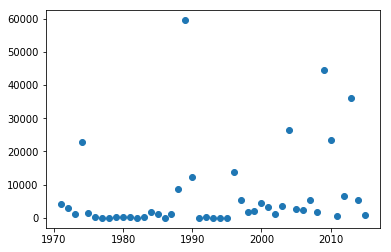

In [48]:
cholera_axis= np.arange(1971,2016,1)
dependency_axis = Nigeria_cholera[""]

#x_axis= Nigeria_fao["Year"]
y_axis = Nigeria_cholera["Display Value"]

plt.plot(x_axis, y_axis, "o")


In [ ]:
# #old code for creating Nigeria dataset

# #selecting data for specific data
# #clean_d = clean_df.loc[clean_df["COUNTRY (DISPLAY)"] == "Nigeria", :]
# clean_d = clean_df.loc[clean_df["COUNTRY (DISPLAY)"].isin(["Nigeria","Niger","Myanmar", "Thailand"])]

# clean =clean_d.groupby(["YEAR (DISPLAY)"])
# # clean.head()
# clean.head()